# Final project

### Do what would make sense?

Month, itens and stores. Some itens can be more sold in some stores in specific months.

How can I found this?

01. To find sells by item, month and store. 
02. To find the stores that likely target store.
03. To do some encoding in categorical variables. 




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
import numpy as np


In [2]:
from IPython.core.display import display, HTML


## Reading the data

In [3]:
#import data
df_i = pd.read_csv('items.csv')
df_s = pd.read_csv('shops.csv')
df_ic = pd.read_csv('item_categories.csv')
df_st = pd.read_csv('sales_train.csv.gz', compression='gzip')
df_st['dt'] = pd.to_datetime(df_st['date'],format='%d.%m.%Y')
df_ts = pd.read_csv('test.csv.gz', compression='gzip')
df_ss = pd.read_csv('sample_submission.csv.gz', compression='gzip')




In [4]:
def glimpse_data(df,title=''):
    first_row = '=' * 30 + title + 30 * '='
    
    
    str_html = (
        '<h2>%s</h2>'
        '<ul><li>Shape: %s</li>' 
        '<li>Head <br/>%s</li>'  
        '<li>Data types <br/>%s</li>'
        '<li>Describe <br/>%s</li>'
        '<li>Unique values <br/>%s</li>'
        '</ul>'
    %(str(title),
      str(df.shape),
      str(df.head().to_html()), 
      str(pd.DataFrame(df.dtypes,columns=['tipo']).to_html()),
      str(df.describe().to_html()),
      str(pd.DataFrame(df.nunique(),columns=['qtd']).to_html())
     )
    )
    display(HTML(str_html))


In [5]:
l = list(df_ic.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


df_ic['cats'] = l_cat
df_item_cat = pd.merge(df_i, df_ic, on='item_category_id')[['item_id','cats']]


In [6]:
#A glimpse on dataframes
glimpse_data(df_ts, 'Test (df_ts)')
glimpse_data(df_ss, 'Sample submission (df_ss)')
glimpse_data(df_i,'Items (df_i)')
glimpse_data(df_s, 'Shops (df_s)')
glimpse_data(df_ic, 'Items categories (df_ic)')
glimpse_data(df_st, 'Sales train (df_st)')



### Type of data in Sales train 
<ul>
    <li>date: date</li>
    <li>date_block_num: categorical</li>
    <li>shop_id: categorical</li>
    <li>item_id: categorical</li>
    <li>item_price: numerical</li>
    <li> item_cnt_day: numerical</li>
</ul>


In [7]:
import datetime


In [8]:
print(str(df_st.dt.min()) + ' until ' +str(df_st.dt.max()))
print(sorted(df_st.shop_id.unique()))

2013-01-01 00:00:00 until 2015-10-31 00:00:00
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [9]:
df = df_st.copy()

#A first work with data

df['day'] = df_st['dt'].dt.day
df['month'] = df_st['dt'].dt.month
df['year'] = df_st['dt'].dt.year
df['ttl_item'] = df_st['item_cnt_day']


In [10]:
df['ano_mes'] = df.year.astype(str) + '_' + df.month.astype(str).str.zfill(2)

In [11]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,dt,day,month,year,ttl_item,ano_mes
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,2,1,2013,1.0,2013_01
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,3,1,2013,1.0,2013_01
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,5,1,2013,-1.0,2013_01
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,6,1,2013,1.0,2013_01
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,15,1,2013,1.0,2013_01


In [12]:
df_month = df.groupby(['ano_mes','item_id','shop_id'])['ttl_item'].sum().reset_index()

In [13]:
print(df_month.shape)
df_month['shop_item'] = df_month.shop_id.astype(str).str.zfill(5) + '_' + df_month.item_id.astype(str).str.zfill(6)
df_month.head()

(1609124, 4)


,ano_mes,item_id,shop_id,ttl_item,shop_item
0,2013_01,19,25,1.0,00025_000019
1,2013_01,27,1,1.0,00001_000027
2,2013_01,27,2,1.0,00002_000027
3,2013_01,27,10,1.0,00010_000027
4,2013_01,27,19,1.0,00019_000027


In [14]:
tb = df_month.pivot(index='shop_item', columns='ano_mes', values='ttl_item')
tb.fillna(0,axis=1,inplace=True)
m = pd.melt(tb.reset_index(), id_vars=['shop_item'], value_vars=tb.columns[1:])
m.columns = ['shop_item','ano_mes','target']

In [15]:
m['shop_id'] = m['shop_item'].apply(lambda x: x.split('_')[0]).astype(int)
m['item_id'] = m['shop_item'].apply(lambda x: x.split('_')[1]).astype(int)
m['year'] = m['ano_mes'].apply(lambda x: x.split('_')[0]).astype(int)
m['month'] = m['ano_mes'].apply(lambda x: x.split('_')[1]).astype(int)
m['day'] = 1
m['dt'] = pd.to_datetime(m[['year','month','day']])
m = pd.merge(m,df_item_cat,on='item_id')

In [16]:
glimpse_data(m,'Data')

In [17]:
m.set_index('dt',inplace=True)

In [18]:
m['lag01'] = m.groupby('shop_item').shift(1)['target']
m['lag12'] = m.groupby('shop_item').shift(12)['target']
m.fillna(0,axis=1,inplace=True)

In [19]:
m[m.shop_item=='00003_000030'].head()

,shop_item,ano_mes,target,shop_id,item_id,year,month,day,cats,lag01,lag12
dt,,,,,,,,,,,
2013-02-01,00003_000030,2013_02,4.0,3,30,2013,2,1,Movie,0.0,0.0
2013-03-01,00003_000030,2013_03,5.0,3,30,2013,3,1,Movie,4.0,0.0
2013-04-01,00003_000030,2013_04,2.0,3,30,2013,4,1,Movie,5.0,0.0
2013-05-01,00003_000030,2013_05,2.0,3,30,2013,5,1,Movie,2.0,0.0
2013-06-01,00003_000030,2013_06,1.0,3,30,2013,6,1,Movie,2.0,0.0


In [20]:
m['target_clip'] = m.target.clip(0,20)

In [21]:

t = m.copy().reset_index()
t.set_index(['shop_item','dt'],inplace=True)
cols_mt = ['cats','shop_id','item_id']
for c in cols_mt:
    t[c + '_mean_target'] = (t.groupby(c)['target_clip'].transform('mean') *
                     t.groupby(c)['target_clip'].transform('count') + t.target_clip.mean() * 100 ) / (t.groupby(c)['target_clip'].transform('count') + 100)
t.head()

,,ano_mes,target,shop_id,item_id,year,month,day,cats,lag01,lag12,target_clip,cats_mean_target,shop_id_mean_target,item_id_mean_target
shop_item,dt,,,,,,,,,,,,,,
00000_000030,2013-02-01,2013_02,31.0,0,30,2013,2,1,Movie,0.0,0.0,20.0,0.14665,0.049137,0.969343
00001_000030,2013-02-01,2013_02,10.0,1,30,2013,2,1,Movie,0.0,0.0,10.0,0.14665,0.040024,0.969343
00002_000030,2013-02-01,2013_02,0.0,2,30,2013,2,1,Movie,0.0,0.0,0.0,0.14665,0.173413,0.969343
00003_000030,2013-02-01,2013_02,4.0,3,30,2013,2,1,Movie,0.0,0.0,4.0,0.14665,0.153364,0.969343
00004_000030,2013-02-01,2013_02,7.0,4,30,2013,2,1,Movie,0.0,0.0,7.0,0.14665,0.162158,0.969343


In [22]:
X_col = ['cats_mean_target' ,'shop_id_mean_target', 'item_id_mean_target','lag01','lag12']
y_col = 'target_clip'

df_tm = t[X_col]

### Training a Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split



In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_tm,t[y_col].values, test_size = 0.25, random_state = 42)

In [25]:
print('Shape train: ', X_train.shape)
print('Shape teste: ', X_test.shape)


Shape train:  (10497069, 5)
Shape teste:  (3499023, 5)


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Train the model on training data
rf.fit(X_train,y_train);

In [27]:
predictions = rf.predict(X_test)


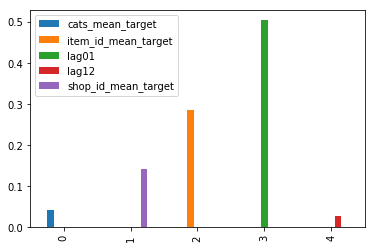

In [32]:
%matplotlib inline
fi = [{c:f}for f,c in zip(rf.feature_importances_,X_col)]
pd.DataFrame(fi).plot(kind='bar')  


In [98]:
predictions[:5]

array([ 0.03624845,  0.67668831,  0.10760884,  0.03359966,  0.03174732])

In [99]:
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.29 .


In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

0.2912701643743047

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016787FD1518>]], dtype=object)

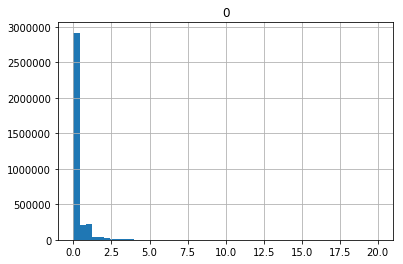

In [101]:
pd.DataFrame(errors).hist(bins=50)

In [102]:
df_sub = df_ts.copy()
df_sub['month'] = 11
df_sub['year'] = 2015
print(df_sub.shape)

df_sub = pd.merge(df_sub,df_item_cat,on='item_id')
print(df_sub.shape)


(214200, 5)
(214200, 6)


In [103]:
X_col = ['cats_mean_target' ,'shop_id_mean_target', 'item_id_mean_target','lag01','lag12']
print(df_sub.shape)
for c in X_col:
    if c.endswith('mean_target'):
        b  = t[[c.split('_mean_')[0],c]].groupby(c.split('_mean_')[0],as_index=False).max()
        print(b.head())
        df_sub = pd.merge(df_sub, b,left_on=c.split('_mean_')[0], right_on=b.columns[0],how='left')
        print(df_sub.shape)
target_lag01 = t[t.ano_mes == '2015_10'][['target','shop_id','item_id']].reset_index()
target_lag01.columns = ['lag01' if c == 'target' else c for c in target_lag01.columns]
df_sub = pd.merge(df_sub, target_lag01,on=['shop_id','item_id'],how='left')
target_lag12 = t[t.ano_mes == '2014_11'][['target','shop_id','item_id']].reset_index()
target_lag12.columns = ['lag12' if c == 'target' else c for c in target_lag12.columns]
df_sub = pd.merge(df_sub, target_lag12,on=['shop_id','item_id'],how='left')


(214200, 6)
       cats  cats_mean_target
0    Access          0.345718
1     Books          0.158315
2  CD games          0.575361
3      Card          1.110944
4  Consoles          0.202111
(214200, 7)
   shop_id  shop_id_mean_target
0        0             0.049137
1        1             0.040024
2        2             0.173413
3        3             0.153364
4        4             0.162158
(214200, 8)
   item_id  item_id_mean_target
0        0             0.175566
1        1             0.213160
2        2             0.183085
3        3             0.183085
4        4             0.175566
(214200, 9)


In [104]:
df_sub.head()

,ID,shop_id,item_id,month,year,cats,cats_mean_target,shop_id_mean_target,item_id_mean_target,shop_item_x,dt_x,lag01,shop_item_y,dt_y,lag12
0,0,5,5037,11,2015,Consoles Games,0.347987,0.174285,0.737914,00005_005037,2015-10-01,0.0,00005_005037,2014-11-01,1.0
1,5100,4,5037,11,2015,Consoles Games,0.347987,0.162158,0.737914,00004_005037,2015-10-01,0.0,00004_005037,2014-11-01,0.0
2,10200,6,5037,11,2015,Consoles Games,0.347987,0.223467,0.737914,00006_005037,2015-10-01,1.0,00006_005037,2014-11-01,4.0
3,15300,3,5037,11,2015,Consoles Games,0.347987,0.153364,0.737914,00003_005037,2015-10-01,0.0,00003_005037,2014-11-01,2.0
4,20400,2,5037,11,2015,Consoles Games,0.347987,0.173413,0.737914,00002_005037,2015-10-01,0.0,00002_005037,2014-11-01,0.0


In [105]:
df_sub.set_index('ID',inplace=True)
df_sub = df_sub[X_col]


In [106]:
df_sub.fillna(0,inplace=True,axis=1)
df_sub.head()

,cats_mean_target,shop_id_mean_target,item_id_mean_target,lag01,lag12
ID,,,,,
0,0.347987,0.174285,0.737914,0.0,1.0
5100,0.347987,0.162158,0.737914,0.0,0.0
10200,0.347987,0.223467,0.737914,1.0,4.0
15300,0.347987,0.153364,0.737914,0.0,2.0
20400,0.347987,0.173413,0.737914,0.0,0.0


In [107]:
y_sub = rf.predict(df_sub)

In [108]:
y_sub[:5]

array([ 0.35333333,  0.16379841,  0.6       ,  0.        ,  0.34595786])

In [110]:
rstd = []
for x,y in zip(df_sub.index.values,y_sub):
    rstd.append({'ID' : x, 'item_cnt_month' : y})

In [113]:
pd.DataFrame(rstd).to_csv('submission18-04-17.csv',index=False)